In [1]:
import pandas as pd
import sklearn
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import numpy
import scipy
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [305]:
init_path = '../sample_characterization'
population = 'children'
char_table = population+'_curvelet_sample.csv'
print(init_path+'/'+char_table)
features = pd.read_csv(init_path+'/'+char_table)

../sample_characterization/children_curvelet_sample.csv


In [306]:
display(features)

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
0,1.0,Left Frontal Pole,28754.0,1.0,ABIDE-II,GU_1,9.29863,0.035511,0.315979,2.516992,...,-2.414316e-21,0.001084,0.345604,-1.071508e-19,0.001113,0.353453,0.000723,0.000900,0.350184,-1.533322e-10
1,2.0,Right Frontal Pole,28754.0,1.0,ABIDE-II,GU_1,9.29863,1.062772,0.653564,2.494459,...,-2.067040e-04,0.000384,0.306954,-3.623065e-22,0.000395,0.312614,-0.000077,0.000360,0.311779,1.443220e-09
2,3.0,Left Insular Cortex,28754.0,1.0,ABIDE-II,GU_1,9.29863,0.677304,0.646844,1.592121,...,-1.622077e-03,0.006492,0.530173,2.025441e-19,0.006885,0.549207,-0.001131,0.007081,0.562131,-1.004113e-10
3,4.0,Right Insular Cortex,28754.0,1.0,ABIDE-II,GU_1,9.29863,0.863379,0.675200,1.791696,...,5.552350e-19,0.005350,0.511345,1.339615e-20,0.006953,0.555422,-0.000965,0.004812,0.517931,-7.382560e-10
4,5.0,Left Superior Frontal Gyrus,28754.0,1.0,ABIDE-II,GU_1,9.29863,0.032216,0.317626,2.171904,...,2.328308e-19,0.000683,0.325184,-1.617234e-20,0.000717,0.330370,0.000418,0.000515,0.320246,4.330403e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53815,113.0,Right Putamen,50626.0,1.0,ABIDE-I,Yale,11.08000,0.059242,0.341229,2.462653,...,1.629266e-03,0.010109,0.560453,-4.741195e-19,0.011153,0.576290,-0.000639,0.011190,0.577465,1.903720e-08
53816,114.0,Right Pallidum,50626.0,1.0,ABIDE-I,Yale,11.08000,1.483413,0.633073,3.356376,...,6.148631e-19,0.043063,0.714116,-9.637353e-21,0.049735,0.738526,-0.012387,0.048015,0.723141,4.900239e-06
53817,115.0,Right Hippocampus,50626.0,1.0,ABIDE-I,Yale,11.08000,10.403840,3.495014,4.519541,...,-3.146493e-18,0.070341,0.853241,2.448105e-19,0.066094,0.880493,0.003626,0.064986,0.984714,7.428193e-13
53818,116.0,Right Amydgala,50626.0,1.0,ABIDE-I,Yale,11.08000,5.295828,1.229528,3.839533,...,-3.799870e-19,0.037109,0.687598,7.775278e-19,0.030167,0.713675,0.002765,0.027772,0.814116,5.470343e-09


In [307]:
single_region = 'Left Frontal Pole'

In [308]:
table_region = features[features['region_name']==single_region]
table_region_controls = table_region[table_region['dx_group']==2]
display(table_region_controls)

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
4446,1.0,Left Frontal Pole,28741.0,2.0,ABIDE-II,GU_1,12.005479,0.237523,0.410036,3.111814,...,1.064400e-03,0.006736,0.466804,2.655189e-20,0.005967,0.466659,0.000206,0.004246,0.448068,6.933734e-09
4563,1.0,Left Frontal Pole,28743.0,2.0,ABIDE-II,GU_1,12.438356,1.420906,0.688937,2.857993,...,1.396213e-18,0.001763,0.365962,-8.429724e-21,0.001362,0.358160,0.000262,0.001104,0.356308,8.238455e-08
4680,1.0,Left Frontal Pole,28744.0,2.0,ABIDE-II,GU_1,9.887671,0.912759,0.632178,2.362314,...,-1.746107e-04,0.000256,0.288068,-1.409489e-19,0.000286,0.296751,0.000329,0.000218,0.292227,3.860560e-09
4797,1.0,Left Frontal Pole,28746.0,2.0,ABIDE-II,GU_1,9.545205,1.303370,0.685068,2.650750,...,-1.045857e-19,0.002011,0.376499,-8.499255e-20,0.001580,0.371488,-0.000162,0.001309,0.371060,-2.593256e-09
4914,1.0,Left Frontal Pole,28747.0,2.0,ABIDE-II,GU_1,11.761644,0.954583,0.634690,2.427622,...,-9.172996e-05,0.000231,0.280898,-5.671850e-20,0.000249,0.289640,-0.000382,0.000164,0.281156,1.032159e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51948,1.0,Left Frontal Pole,50562.0,2.0,ABIDE-I,Yale,10.830000,1.468483,0.699147,2.835257,...,-1.849565e-04,0.000942,0.340408,1.203063e-19,0.000669,0.330299,-0.000033,0.000484,0.323812,6.213220e-09
52065,1.0,Left Frontal Pole,50564.0,2.0,ABIDE-I,Yale,7.660000,0.113526,0.368757,2.759753,...,1.271532e-18,0.003401,0.415063,1.986031e-19,0.002561,0.404182,0.000319,0.002328,0.413490,1.910407e-11
52182,1.0,Left Frontal Pole,50566.0,2.0,ABIDE-I,Yale,9.660000,1.610641,0.715610,2.864734,...,7.069379e-19,0.002012,0.370858,5.645787e-19,0.001764,0.373034,0.001770,0.001351,0.369829,-6.079783e-07
52299,1.0,Left Frontal Pole,50574.0,2.0,ABIDE-I,Yale,10.920000,1.392805,0.704634,2.618034,...,9.425186e-04,0.001470,0.366131,-1.098461e-19,0.001099,0.358079,-0.000280,0.000771,0.345406,5.666288e-12


In [494]:
feature_matrix = table_region_controls.iloc[:,-243:].values[:, 1::3]
features_norm = normalize(feature_matrix, axis=0, norm='l2')
#pca_object = PCA(n_components=3)
#features_PCA = pca_object.fit_transform(feature_matrix)
#clustering_obj = KMeans(n_clusters = 4, n_init = 1357)
clustering_obj = AgglomerativeClustering(linkage='ward', n_clusters = None, distance_threshold = 5)
clustering_results = clustering_obj.fit_predict(feature_matrix)
print(clustering_obj.n_clusters_)

2


In [495]:
table_region_controls['clustering_result']=clustering_results

<ipython-input-495-19968ccea9b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_region_controls['clustering_result']=clustering_results


In [496]:
display(table_region_controls)

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243,clustering_result
4446,1.0,Left Frontal Pole,28741.0,2.0,ABIDE-II,GU_1,12.005479,0.237523,0.410036,3.111814,...,0.006736,0.466804,2.655189e-20,0.005967,0.466659,0.000206,0.004246,0.448068,6.933734e-09,0
4563,1.0,Left Frontal Pole,28743.0,2.0,ABIDE-II,GU_1,12.438356,1.420906,0.688937,2.857993,...,0.001763,0.365962,-8.429724e-21,0.001362,0.358160,0.000262,0.001104,0.356308,8.238455e-08,0
4680,1.0,Left Frontal Pole,28744.0,2.0,ABIDE-II,GU_1,9.887671,0.912759,0.632178,2.362314,...,0.000256,0.288068,-1.409489e-19,0.000286,0.296751,0.000329,0.000218,0.292227,3.860560e-09,1
4797,1.0,Left Frontal Pole,28746.0,2.0,ABIDE-II,GU_1,9.545205,1.303370,0.685068,2.650750,...,0.002011,0.376499,-8.499255e-20,0.001580,0.371488,-0.000162,0.001309,0.371060,-2.593256e-09,0
4914,1.0,Left Frontal Pole,28747.0,2.0,ABIDE-II,GU_1,11.761644,0.954583,0.634690,2.427622,...,0.000231,0.280898,-5.671850e-20,0.000249,0.289640,-0.000382,0.000164,0.281156,1.032159e-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51948,1.0,Left Frontal Pole,50562.0,2.0,ABIDE-I,Yale,10.830000,1.468483,0.699147,2.835257,...,0.000942,0.340408,1.203063e-19,0.000669,0.330299,-0.000033,0.000484,0.323812,6.213220e-09,0
52065,1.0,Left Frontal Pole,50564.0,2.0,ABIDE-I,Yale,7.660000,0.113526,0.368757,2.759753,...,0.003401,0.415063,1.986031e-19,0.002561,0.404182,0.000319,0.002328,0.413490,1.910407e-11,0
52182,1.0,Left Frontal Pole,50566.0,2.0,ABIDE-I,Yale,9.660000,1.610641,0.715610,2.864734,...,0.002012,0.370858,5.645787e-19,0.001764,0.373034,0.001770,0.001351,0.369829,-6.079783e-07,0
52299,1.0,Left Frontal Pole,50574.0,2.0,ABIDE-I,Yale,10.920000,1.392805,0.704634,2.618034,...,0.001470,0.366131,-1.098461e-19,0.001099,0.358079,-0.000280,0.000771,0.345406,5.666288e-12,0


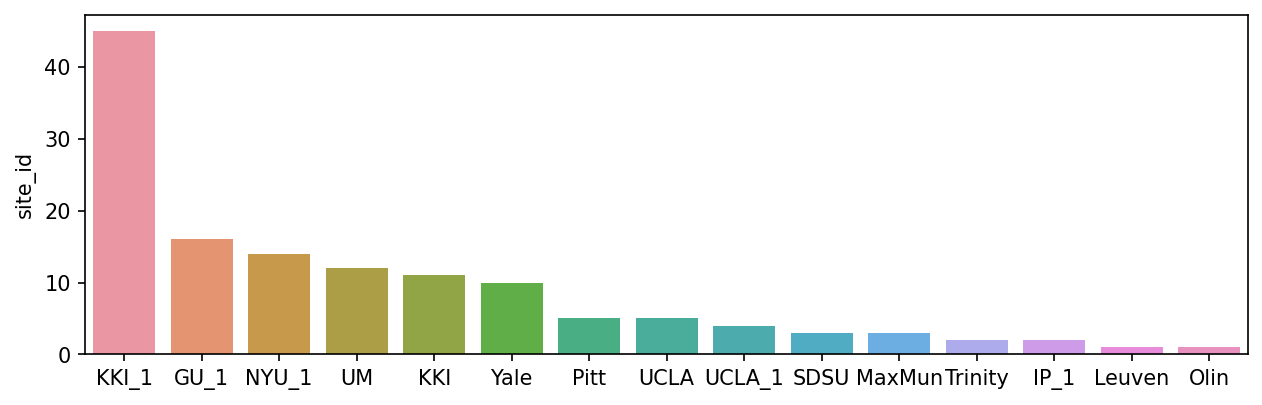

In [497]:
cluster_a = pd.DataFrame(table_region_controls[table_region_controls['clustering_result']==0]['site_id'].value_counts())
cluster_b = pd.DataFrame(table_region_controls[table_region_controls['clustering_result']==1]['site_id'].value_counts())
cluster_c = pd.DataFrame(table_region_controls[table_region_controls['clustering_result']==2]['site_id'].value_counts())
cluster_d = pd.DataFrame(table_region_controls[table_region_controls['clustering_result']==3]['site_id'].value_counts())
cluster_e = pd.DataFrame(table_region_controls[table_region_controls['clustering_result']==4]['site_id'].value_counts())

fig_dims = (10, 3)
fig, ax = plt.subplots(figsize=fig_dims, dpi=150)
#sns.distplot(table_region_controls[table_region_controls['clustering_result']==0]['age'])
sns.barplot(data=cluster_a, x=cluster_a.index, y='site_id', ax=ax)

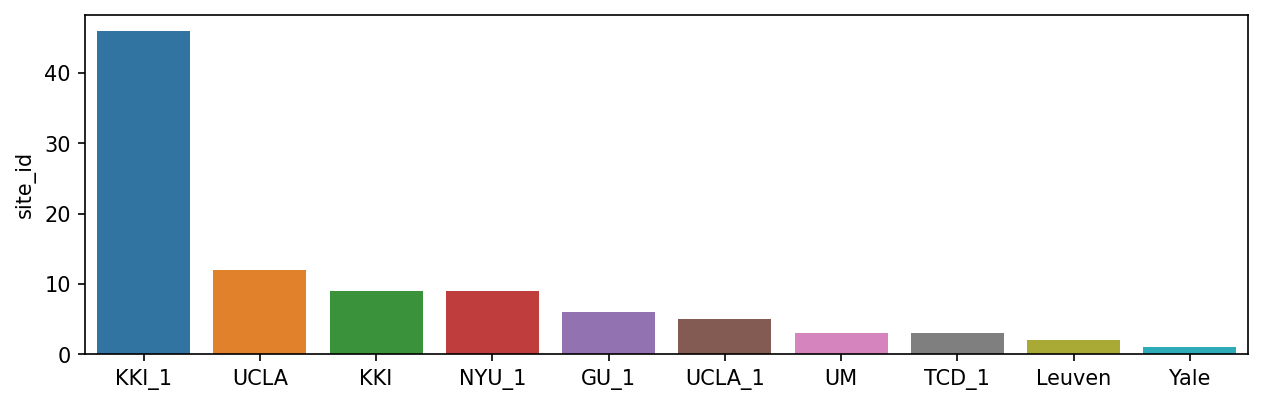

In [498]:
fig_dims = (10, 3)
fig, ax = plt.subplots(figsize=fig_dims, dpi=150)
#sns.distplot(table_region_controls[table_region_controls['clustering_result']==1]['age'])
sns.barplot(data=cluster_b, x=cluster_b.index, y='site_id', ax=ax)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

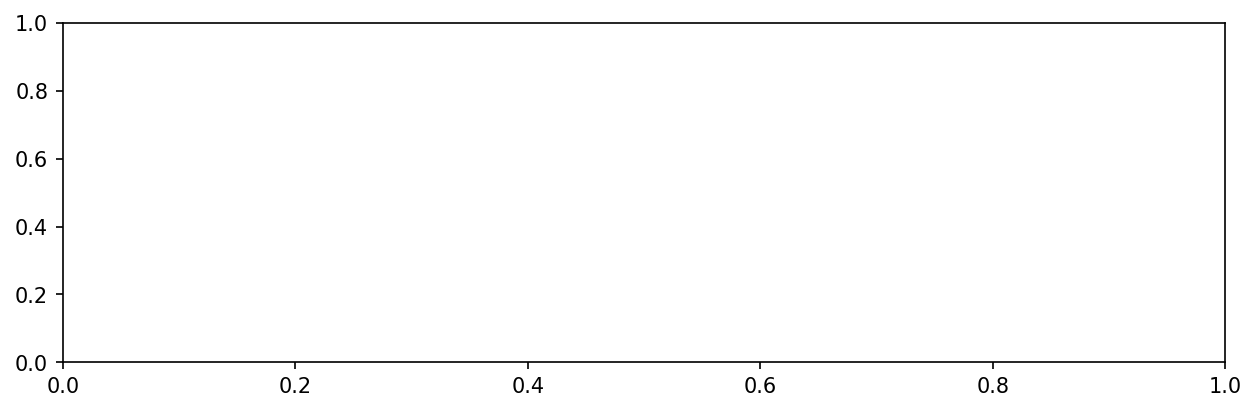

In [501]:
fig_dims = (10, 3)
fig, ax = plt.subplots(figsize=fig_dims, dpi=150)
#sns.distplot(table_region_controls[table_region_controls['clustering_result']==2]['age'])
sns.barplot(data=cluster_c, x=cluster_c.index, y='site_id', ax=ax)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

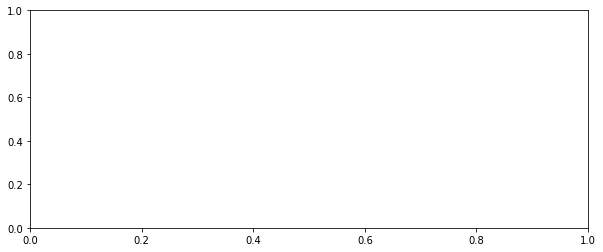

In [502]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.distplot(table_region_controls[table_region_controls['clustering_result']==3]['age'])
sns.barplot(data=cluster_d, x=cluster_d.index, y='site_id', ax=ax)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

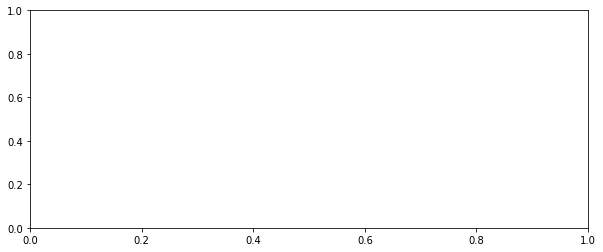

In [503]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.distplot(table_region_controls[table_region_controls['clustering_result']==4]['age'])
sns.barplot(data=cluster_e, x=cluster_e.index, y='site_id', ax=ax)